<h3>Building a base model without using categorical columns

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from feature_engine.encoding import OneHotEncoder

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

import time
from sklearn.linear_model import Lasso
from sklearn.ensemble import ExtraTreesRegressor

In [2]:
def plot1(c,y_test,y_pred,ylabel):
    fig = plt.figure(figsize=(20,5))
    plt.subplot(1, 3, 1)
    plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-",label="y_test")     
    plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-",label="y_pred")
    plt.title('Actual vs Predicted',fontsize=20)
    plt.legend(loc="best")             
    plt.xlabel('Index of data points', fontsize=18)                               
    plt.ylabel(ylabel, fontsize=16) 
    
    plt.subplot(1, 3, 2)
    plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
    plt.title('Error variation',fontsize=20)            
    plt.xlabel('Index of data points', fontsize=18)                     
    plt.ylabel('ytest - ypred', fontsize=16)  
    
    plt.subplot(1, 3, 3)
    sns.kdeplot((y_test-y_pred),color='r')
    plt.title('Error distribution',fontsize=20)              
    plt.xlabel('y_test - y_pred', fontsize=18)                 
    plt.ylabel('Index of data points', fontsize=16)
    plt.show()
    
def plot2(y_test,y_pred):
    fig = plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=y_test,y=y_pred,color='b')
    plt.title('y_test vs y_pred',fontsize=20) 
    plt.xlabel('y_test', fontsize=18)                          
    plt.ylabel('y_pred', fontsize=16)  
    
    plt.subplot(1, 2, 2)
    sns.regplot(x=y_test,y=y_pred,scatter=False,color='k')
    sns.regplot(x=y_test,y=y_test,scatter=False,color='g')
    plt.legend(labels=['model prediction','Actual line'])
    plt.title('Actual vs model prediction',fontsize=20)           
    plt.show()
    
def regression_plots(y_test,y_pred,ylabel,length):
    y_test = y_test.values.ravel()
    y_pred = y_pred.ravel()
    c = [i for i in range(length)]
    plot1(c,y_test,y_pred,ylabel)
    print('\n')
    plot2(y_test,y_pred)
    print('\n')

In [3]:
df=pd.read_csv(r"zomato_rating2.csv") 
df.sample(5)

,name,online_order,book_table,rate,votes,rest_type,cuisines,cost,type,city_location
18400,Deccan Spice,0,0,3.5,65,CasualDining,NorthIndian SouthIndian Biryani,750.0,Dine-out,jpnagar
39882,Kolkata Famous Kati Rolls,0,0,3.7,19,QuickBites,FastFood Rolls,100.0,Dine-out,bellandur sarjapurroad
40455,Biryani Bowl,0,0,3.3,10,Kiosk,Biryani Andhra,550.0,Delivery,whitefield
13877,FreshMenu,1,0,3.8,1082,Delivery,Asian Continental Mediterranean Salad American...,450.0,Delivery,indiranagar
6900,Kairali,1,0,3.9,170,QuickBites,Kerala SouthIndian Seafood Biryani,300.0,Delivery,btm


<h3>Baseline model without any categorical columns

In [4]:
df = df.drop(columns=['name','rest_type','city_location','cuisines','type'])

X=df.iloc[:,df.columns!='rate']
y=df.iloc[:,df.columns=='rate']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101)

scaler = StandardScaler()
X_train[['votes','cost']] = scaler.fit_transform(X_train[['votes','cost']])
X_test[['votes','cost']] = scaler.transform(X_test[['votes','cost']])

In [5]:
X_train.shape,X_test.shape

((30886, 4), (10296, 4))

Results for Lasso Regressor:-

Training time(sec) =  0.1280205249786377
Prediction time(sec) =  0.00799870491027832


Training r2_score = 0.0
Testing r2_score = -1.8947958517756547e-06

Training mean_square_error = 0.19358771047004894
Testing mean_square_error = 0.19337153097633877

Training mean_absolute_error = 0.3506359448422537
Testing mean_absolute_error = 0.3509081967015982


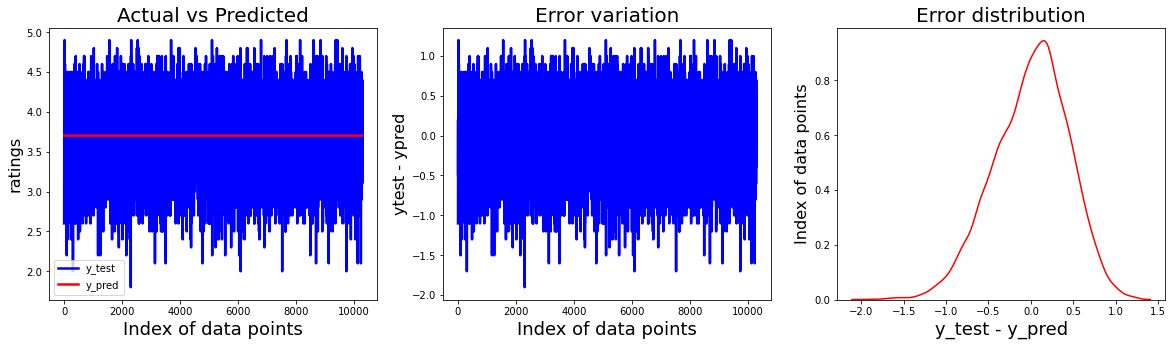

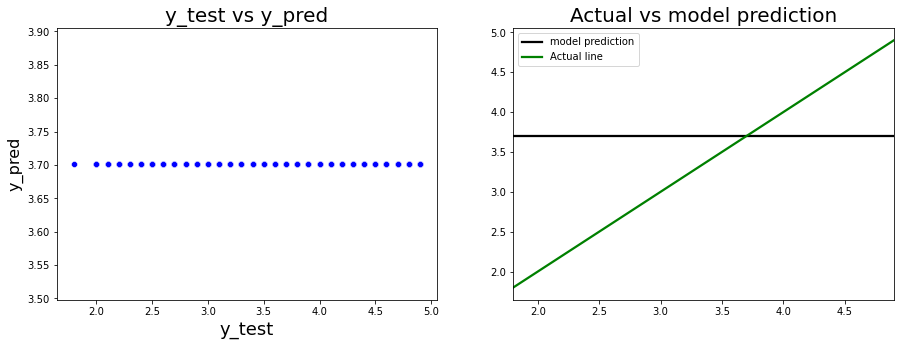

In [6]:
lasso = Lasso(alpha=1.0)

print('Results for Lasso Regressor:-\n')
start_time = time.time()
lasso.fit(X_train,y_train)
lasso_time = (time.time() - start_time)
print('Training time(sec) = ',lasso_time)

y_pred1 = lasso.predict(X_train)

start_time = time.time()
y_pred = lasso.predict(X_test)
lasso_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',lasso_time2)

r2_train = r2_score(y_train,y_pred1)
r2_test = r2_score(y_test,y_pred)
mse_train = mean_squared_error(y_train,y_pred1)
mse_test = mean_squared_error(y_test,y_pred)
mae_train = mean_absolute_error(y_train,y_pred1)
mae_test = mean_absolute_error(y_test,y_pred)

print('\n\nTraining r2_score =',r2_train)
print('Testing r2_score =',r2_test)
print('\nTraining mean_square_error =',mse_train)
print('Testing mean_square_error =',mse_test)
print('\nTraining mean_absolute_error =',mae_train)
print('Testing mean_absolute_error =',mae_test)

regression_plots(y_test,y_pred,ylabel='ratings',length=y_test.shape[0])

Lasso = [r2_train,r2_test,mse_train,mse_test,mae_train,mae_test,lasso_time,lasso_time2]

Results for ExtraTrees Regressor:-

Training time(sec) =  0.9413082599639893
Prediction time(sec) =  0.11872673034667969


Training r2_score = 0.8177301387549968
Testing r2_score = 0.6943420223353295

Training mean_square_error = 0.035285205126113675
Testing mean_square_error = 0.05910543910340807

Training mean_absolute_error = 0.10251557878281986
Testing mean_absolute_error = 0.13760717634558253


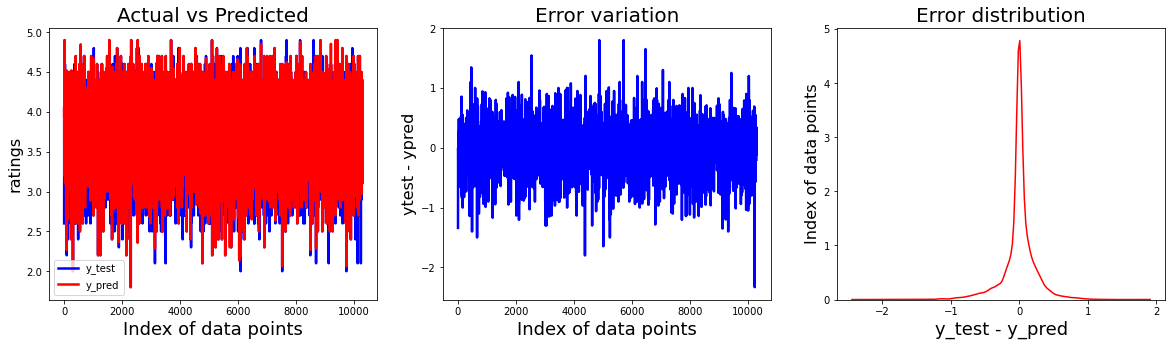

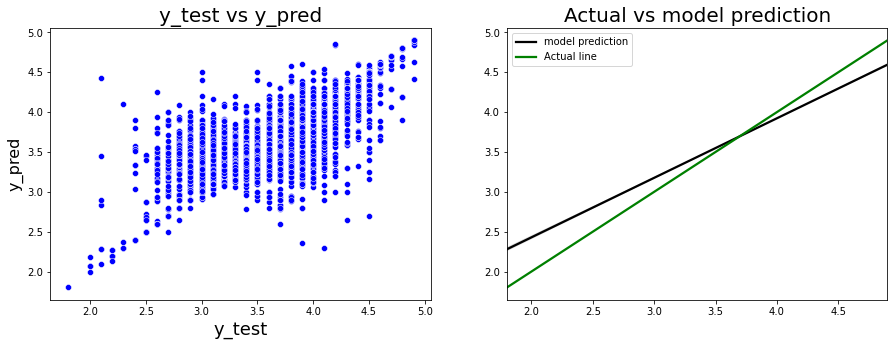

In [7]:
etree = ExtraTreesRegressor(n_jobs=-1)

print('Results for ExtraTrees Regressor:-\n')
start_time = time.time()
etree.fit(X_train,y_train)
etree_time = (time.time() - start_time)
print('Training time(sec) = ',etree_time)

y_pred1 = etree.predict(X_train)

start_time = time.time()
y_pred = etree.predict(X_test)
etree_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',etree_time2)

r2_train = r2_score(y_train,y_pred1)
r2_test = r2_score(y_test,y_pred)
mse_train = mean_squared_error(y_train,y_pred1)
mse_test = mean_squared_error(y_test,y_pred)
mae_train = mean_absolute_error(y_train,y_pred1)
mae_test = mean_absolute_error(y_test,y_pred)

print('\n\nTraining r2_score =',r2_train)
print('Testing r2_score =',r2_test)
print('\nTraining mean_square_error =',mse_train)
print('Testing mean_square_error =',mse_test)
print('\nTraining mean_absolute_error =',mae_train)
print('Testing mean_absolute_error =',mae_test)

regression_plots(y_test,y_pred,ylabel='ratings',length=y_test.shape[0])

Extra_tree = [r2_train,r2_test,mse_train,mse_test,mae_train,mae_test,etree_time,etree_time2]

In [8]:
s1=[Lasso,Extra_tree]
s2=['Lasso','Extra_tree']
col=['r2_score(train)','r2_score(test)','MSE(train)','MSE(test)','MAE(train)','MAE(train)','Training time','Prediction time']
result=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result[s2[i]] = s1[i]

In [9]:
temp = pd.DataFrame.from_dict(result, orient='index',columns=col).reset_index()
result = temp.rename(columns={'index':'model'})

In [10]:
result

,model,r2_score(train),r2_score(test),MSE(train),MSE(test),MAE(train),MAE(train),Training time,Prediction time
0,Lasso,0.00000,-0.000002,0.193588,0.193372,0.350636,0.350908,0.128021,0.007999
1,Extra_tree,0.81773,0.694342,0.035285,0.059105,0.102516,0.137607,0.941308,0.118727


<h3>using numerical columns+type column

In [4]:
df=pd.read_csv(r"zomato_rating2.csv") 

In [5]:
df.drop(columns=['name','rest_type','city_location','cuisines'],inplace=True)

X=df.iloc[:,df.columns!='rate']
y=df.iloc[:,df.columns=='rate']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101)

In [6]:
encoder = OneHotEncoder(variables=['type'], drop_last=True)
X_train= encoder.fit_transform(X_train)
X_test= encoder.transform(X_test)

In [7]:
scaler = StandardScaler()
X_train[['votes','cost']] = scaler.fit_transform(X_train[['votes','cost']])
X_test[['votes','cost']] = scaler.transform(X_test[['votes','cost']])

In [15]:
X_train.shape,X_test.shape

((30886, 10), (10296, 10))

Results for Lasso Regressor:-

Training time(sec) =  0.024005413055419922
Prediction time(sec) =  0.0


Training r2_score = 0.0
Testing r2_score = -1.8947958517756547e-06

Training mean_square_error = 0.19358771047004894
Testing mean_square_error = 0.19337153097633877

Training mean_absolute_error = 0.3506359448422537
Testing mean_absolute_error = 0.3509081967015982


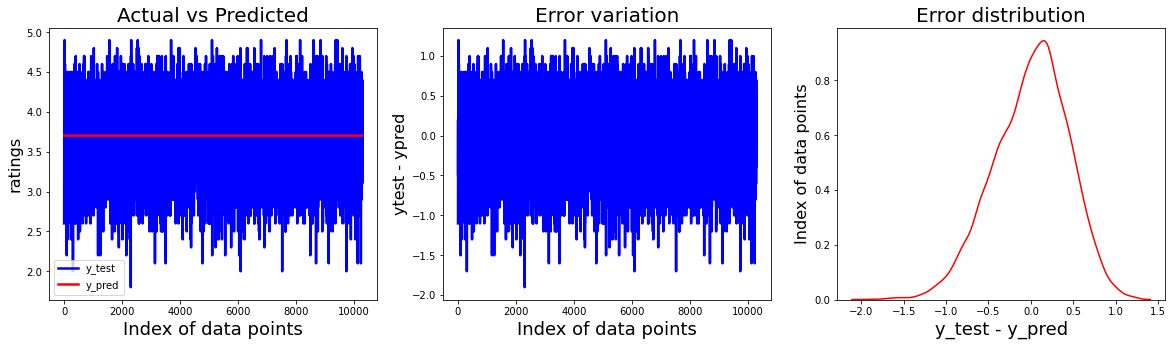

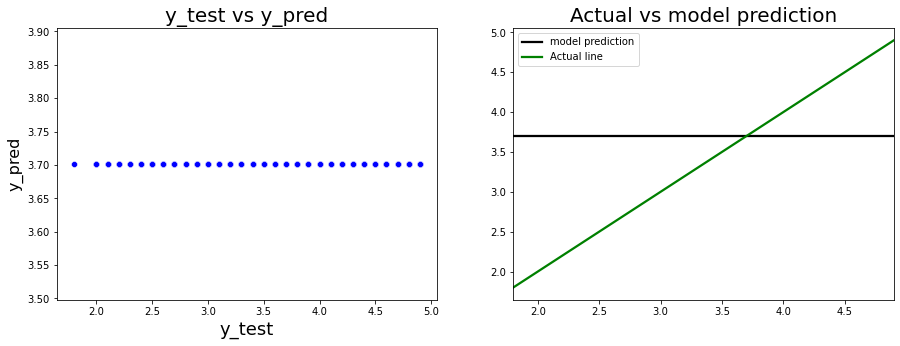

In [16]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

print('Results for Lasso Regressor:-\n')
start_time = time.time()
lasso.fit(X_train,y_train)
lasso_time = (time.time() - start_time)
print('Training time(sec) = ',lasso_time)

y_pred1 = lasso.predict(X_train)

start_time = time.time()
y_pred = lasso.predict(X_test)
lasso_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',lasso_time2)

r2_train = r2_score(y_train,y_pred1)
r2_test = r2_score(y_test,y_pred)
mse_train = mean_squared_error(y_train,y_pred1)
mse_test = mean_squared_error(y_test,y_pred)
mae_train = mean_absolute_error(y_train,y_pred1)
mae_test = mean_absolute_error(y_test,y_pred)

print('\n\nTraining r2_score =',r2_train)
print('Testing r2_score =',r2_test)
print('\nTraining mean_square_error =',mse_train)
print('Testing mean_square_error =',mse_test)
print('\nTraining mean_absolute_error =',mae_train)
print('Testing mean_absolute_error =',mae_test)

regression_plots(y_test,y_pred,ylabel='ratings',length=y_test.shape[0])

Lasso = [r2_train,r2_test,mse_train,mse_test,mae_train,mae_test,lasso_time,lasso_time2]

Results for ExtraTrees Regressor:-

Training time(sec) =  1.8552768230438232
Prediction time(sec) =  0.23333215713500977


Training r2_score = 0.8569840986347657
Testing r2_score = 0.6256208872817537

Training mean_square_error = 0.02768612090610606
Testing mean_square_error = 0.07239412501980282

Training mean_absolute_error = 0.08466091956683715
Testing mean_absolute_error = 0.15718522071723134


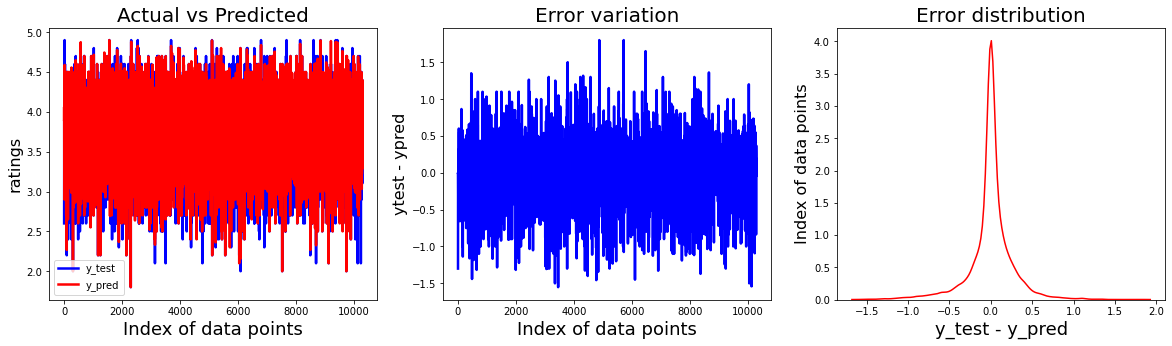

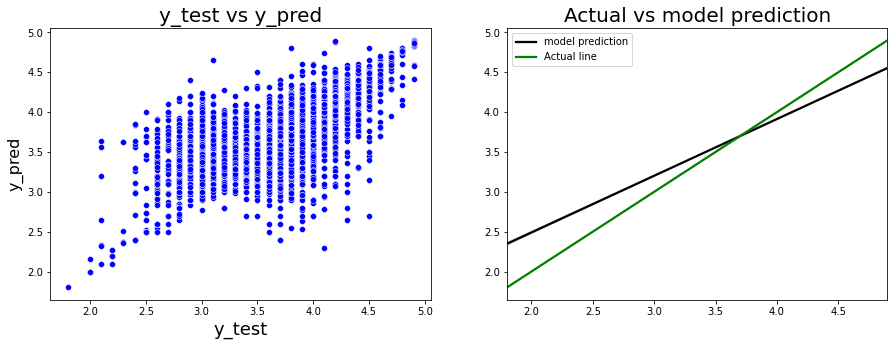

In [17]:
etree = ExtraTreesRegressor(n_jobs=-1)

print('Results for ExtraTrees Regressor:-\n')
start_time = time.time()
etree.fit(X_train,y_train)
etree_time = (time.time() - start_time)
print('Training time(sec) = ',etree_time)

y_pred1 = etree.predict(X_train)

start_time = time.time()
y_pred = etree.predict(X_test)
etree_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',etree_time2)

r2_train = r2_score(y_train,y_pred1)
r2_test = r2_score(y_test,y_pred)
mse_train = mean_squared_error(y_train,y_pred1)
mse_test = mean_squared_error(y_test,y_pred)
mae_train = mean_absolute_error(y_train,y_pred1)
mae_test = mean_absolute_error(y_test,y_pred)

print('\n\nTraining r2_score =',r2_train)
print('Testing r2_score =',r2_test)
print('\nTraining mean_square_error =',mse_train)
print('Testing mean_square_error =',mse_test)
print('\nTraining mean_absolute_error =',mae_train)
print('Testing mean_absolute_error =',mae_test)

regression_plots(y_test,y_pred,ylabel='ratings',length=y_test.shape[0])

Extra_tree = [r2_train,r2_test,mse_train,mse_test,mae_train,mae_test,etree_time,etree_time2]

In [18]:
s1=[Lasso,Extra_tree]
s2=['Lasso','Extra_tree']
col=['r2_score(train)','r2_score(test)','MSE(train)','MSE(test)','MAE(train)','MAE(train)','Training time','Prediction time']
result2=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result2[s2[i]] = s1[i]

In [19]:
temp = pd.DataFrame.from_dict(result2, orient='index',columns=col).reset_index()
result2 = temp.rename(columns={'index':'model'})

In [20]:
result2

,model,r2_score(train),r2_score(test),MSE(train),MSE(test),MAE(train),MAE(train),Training time,Prediction time
0,Lasso,0.000000,-0.000002,0.193588,0.193372,0.350636,0.350908,0.024005,0.000000
1,Extra_tree,0.856984,0.625621,0.027686,0.072394,0.084661,0.157185,1.855277,0.233332


In [21]:
result

,model,r2_score(train),r2_score(test),MSE(train),MSE(test),MAE(train),MAE(train),Training time,Prediction time
0,Lasso,0.00000,-0.000002,0.193588,0.193372,0.350636,0.350908,0.128021,0.007999
1,Extra_tree,0.81773,0.694342,0.035285,0.059105,0.102516,0.137607,0.941308,0.118727


<h3>using numerical columns+rest_type column

In [8]:
df=pd.read_csv(r"zomato_rating2.csv") 

In [9]:
df.drop(columns=['name','cuisines','city_location','type'],inplace=True)

X=df.iloc[:,df.columns!='rate']
y=df.iloc[:,df.columns=='rate']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101)

In [10]:
scaler=StandardScaler()
vec = TfidfVectorizer(lowercase=True)

other_col=['online_order','book_table']
num_features=['votes','cost']
cat_features='rest_type'

preprocessor = ColumnTransformer(
    transformers=[
        ('other','passthrough',other_col),
        ('num', scaler, num_features),
        ('cat', vec, cat_features)])

X_train= preprocessor.fit_transform(X_train)
X_test= preprocessor.transform(X_test)

preprocessor

ColumnTransformer(transformers=[('other', 'passthrough',
                                 ['online_order', 'book_table']),
                                ('num', StandardScaler(), ['votes', 'cost']),
                                ('cat', TfidfVectorizer(), 'rest_type')])

In [25]:
X_train.shape,X_test.shape

((30886, 28), (10296, 28))

Results for Lasso Regressor:-

Training time(sec) =  0.03994417190551758
Prediction time(sec) =  0.0


Training r2_score = 0.0
Testing r2_score = -1.8947958517756547e-06

Training mean_square_error = 0.19358771047004894
Testing mean_square_error = 0.19337153097633877

Training mean_absolute_error = 0.3506359448422537
Testing mean_absolute_error = 0.3509081967015982


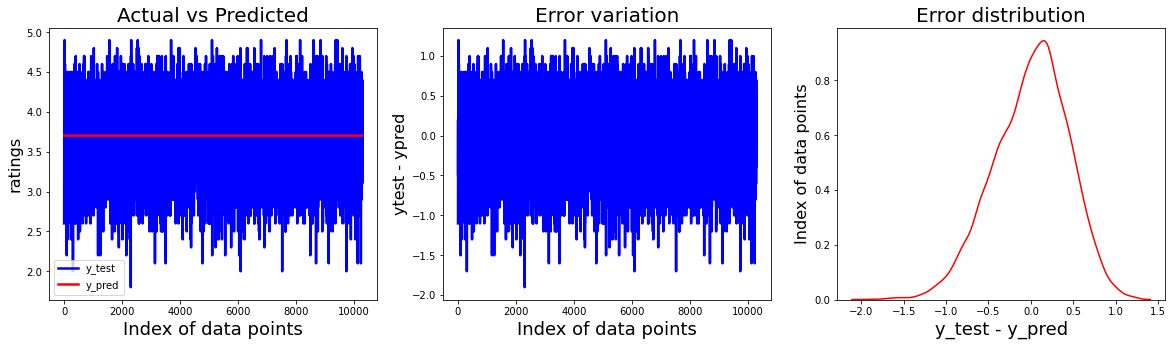

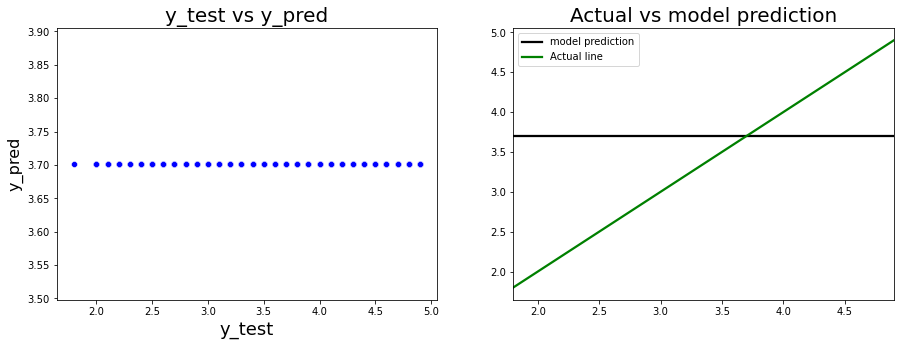

In [27]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

print('Results for Lasso Regressor:-\n')
start_time = time.time()
lasso.fit(X_train,y_train)
lasso_time = (time.time() - start_time)
print('Training time(sec) = ',lasso_time)

y_pred1 = lasso.predict(X_train)

start_time = time.time()
y_pred = lasso.predict(X_test)
lasso_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',lasso_time2)

r2_train = r2_score(y_train,y_pred1)
r2_test = r2_score(y_test,y_pred)
mse_train = mean_squared_error(y_train,y_pred1)
mse_test = mean_squared_error(y_test,y_pred)
mae_train = mean_absolute_error(y_train,y_pred1)
mae_test = mean_absolute_error(y_test,y_pred)

print('\n\nTraining r2_score =',r2_train)
print('Testing r2_score =',r2_test)
print('\nTraining mean_square_error =',mse_train)
print('Testing mean_square_error =',mse_test)
print('\nTraining mean_absolute_error =',mae_train)
print('Testing mean_absolute_error =',mae_test)

regression_plots(y_test,y_pred,ylabel='ratings',length=y_test.shape[0])

Lasso = [r2_train,r2_test,mse_train,mse_test,mae_train,mae_test,lasso_time,lasso_time2]

Results for ExtraTrees Regressor:-

Training time(sec) =  16.133626222610474
Prediction time(sec) =  0.21926021575927734


Training r2_score = 0.9207256076569186
Testing r2_score = 0.808119655552958

Training mean_square_error = 0.015346548112601516
Testing mean_square_error = 0.03710412566524835

Training mean_absolute_error = 0.052683492809023756
Testing mean_absolute_error = 0.08916641919119553


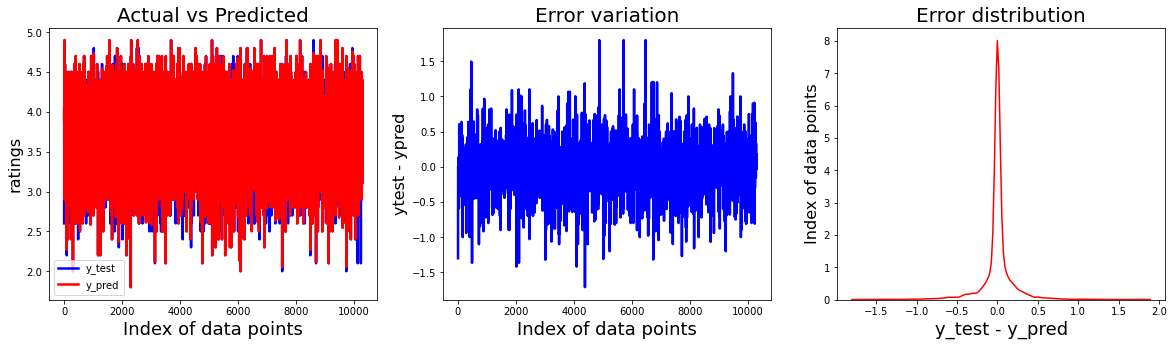

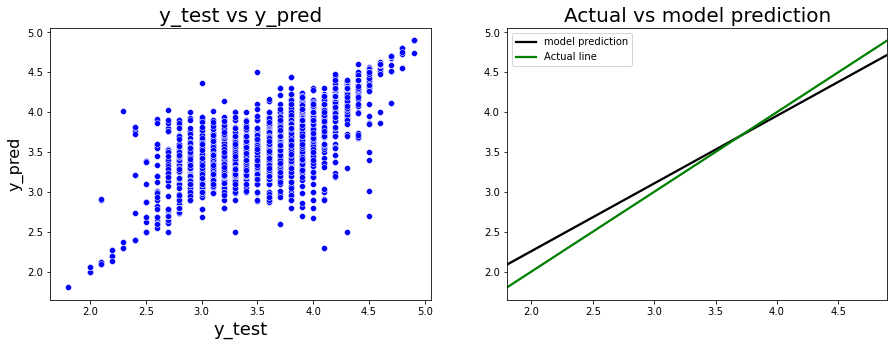

In [28]:
etree = ExtraTreesRegressor(n_jobs=-1)

print('Results for ExtraTrees Regressor:-\n')
start_time = time.time()
etree.fit(X_train,y_train)
etree_time = (time.time() - start_time)
print('Training time(sec) = ',etree_time)

y_pred1 = etree.predict(X_train)

start_time = time.time()
y_pred = etree.predict(X_test)
etree_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',etree_time2)

r2_train = r2_score(y_train,y_pred1)
r2_test = r2_score(y_test,y_pred)
mse_train = mean_squared_error(y_train,y_pred1)
mse_test = mean_squared_error(y_test,y_pred)
mae_train = mean_absolute_error(y_train,y_pred1)
mae_test = mean_absolute_error(y_test,y_pred)

print('\n\nTraining r2_score =',r2_train)
print('Testing r2_score =',r2_test)
print('\nTraining mean_square_error =',mse_train)
print('Testing mean_square_error =',mse_test)
print('\nTraining mean_absolute_error =',mae_train)
print('Testing mean_absolute_error =',mae_test)

regression_plots(y_test,y_pred,ylabel='ratings',length=y_test.shape[0])

Extra_tree = [r2_train,r2_test,mse_train,mse_test,mae_train,mae_test,etree_time,etree_time2]

In [29]:
s1=[Lasso,Extra_tree]
s2=['Lasso','Extra_tree']
col=['r2_score(train)','r2_score(test)','MSE(train)','MSE(test)','MAE(train)','MAE(train)','Training time','Prediction time']
result2=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result2[s2[i]] = s1[i]

In [30]:
temp = pd.DataFrame.from_dict(result2, orient='index',columns=col).reset_index()
result2 = temp.rename(columns={'index':'model'})

In [31]:
result2

,model,r2_score(train),r2_score(test),MSE(train),MSE(test),MAE(train),MAE(train),Training time,Prediction time
0,Lasso,0.000000,-0.000002,0.193588,0.193372,0.350636,0.350908,0.039944,0.00000
1,Extra_tree,0.920726,0.808120,0.015347,0.037104,0.052683,0.089166,16.133626,0.21926


In [32]:
result

,model,r2_score(train),r2_score(test),MSE(train),MSE(test),MAE(train),MAE(train),Training time,Prediction time
0,Lasso,0.00000,-0.000002,0.193588,0.193372,0.350636,0.350908,0.024006,0.007995
1,Extra_tree,0.81773,0.694626,0.035285,0.059050,0.102519,0.137564,1.069073,0.118234


<h3>using numerical columns+city_location column

In [33]:
df=pd.read_csv(r"zomato_rating2.csv") 

In [34]:
df.drop(columns=['name','rest_type','cuisines','type'],inplace=True)

X=df.iloc[:,df.columns!='rate']
y=df.iloc[:,df.columns=='rate']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101)

In [35]:
other_col=['online_order','book_table']
num_features=['votes','cost']
cat_features='city_location'

preprocessor = ColumnTransformer(
    transformers=[
        ('other','passthrough',other_col),
        ('num', scaler, num_features),
        ('cat', vec, cat_features)])

X_train= preprocessor.fit_transform(X_train)
X_test= preprocessor.transform(X_test)

preprocessor

ColumnTransformer(transformers=[('other', 'passthrough',
                                 ['online_order', 'book_table']),
                                ('num', StandardScaler(), ['votes', 'cost']),
                                ('cat', TfidfVectorizer(), 'city_location')])

In [36]:
X_train.shape,X_test.shape

((30886, 96), (10296, 96))

Results for Lasso Regressor:-

Training time(sec) =  0.04000449180603027
Prediction time(sec) =  0.0


Training r2_score = 0.0
Testing r2_score = -1.8947958517756547e-06

Training mean_square_error = 0.19358771047004894
Testing mean_square_error = 0.19337153097633877

Training mean_absolute_error = 0.3506359448422537
Testing mean_absolute_error = 0.3509081967015982


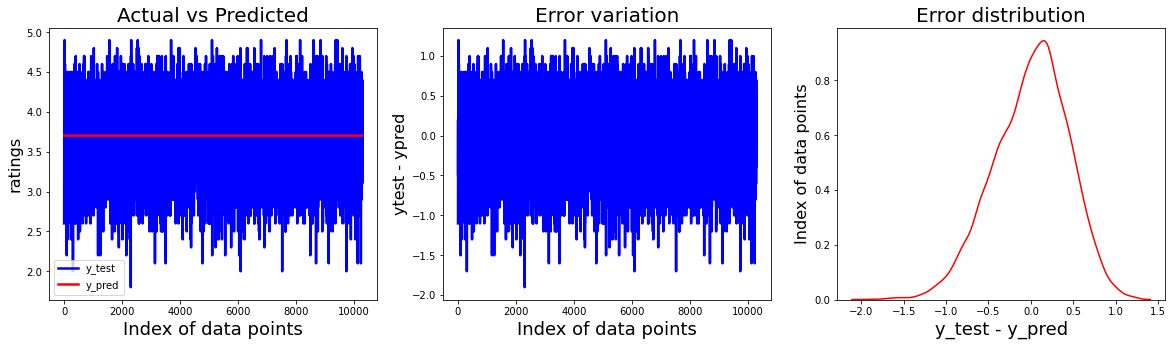

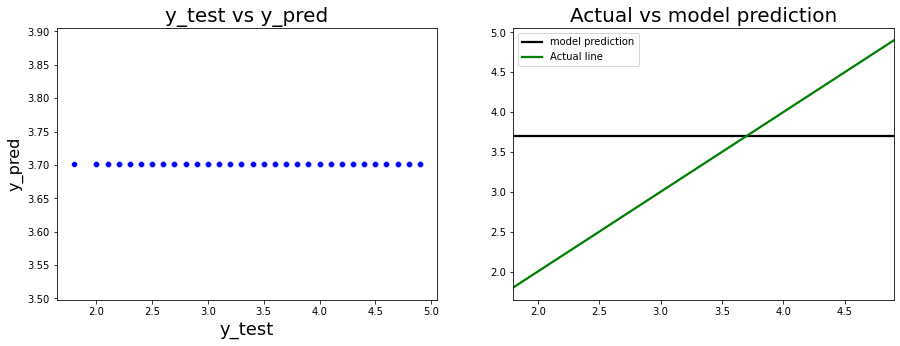

In [37]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

print('Results for Lasso Regressor:-\n')
start_time = time.time()
lasso.fit(X_train,y_train)
lasso_time = (time.time() - start_time)
print('Training time(sec) = ',lasso_time)

y_pred1 = lasso.predict(X_train)

start_time = time.time()
y_pred = lasso.predict(X_test)
lasso_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',lasso_time2)

r2_train = r2_score(y_train,y_pred1)
r2_test = r2_score(y_test,y_pred)
mse_train = mean_squared_error(y_train,y_pred1)
mse_test = mean_squared_error(y_test,y_pred)
mae_train = mean_absolute_error(y_train,y_pred1)
mae_test = mean_absolute_error(y_test,y_pred)

print('\n\nTraining r2_score =',r2_train)
print('Testing r2_score =',r2_test)
print('\nTraining mean_square_error =',mse_train)
print('Testing mean_square_error =',mse_test)
print('\nTraining mean_absolute_error =',mae_train)
print('Testing mean_absolute_error =',mae_test)

regression_plots(y_test,y_pred,ylabel='ratings',length=y_test.shape[0])

Lasso = [r2_train,r2_test,mse_train,mse_test,mae_train,mae_test,lasso_time,lasso_time2]

Results for ExtraTrees Regressor:-

Training time(sec) =  46.62128400802612
Prediction time(sec) =  0.22604584693908691


Training r2_score = 0.9889384636368648
Testing r2_score = 0.7899801397802109

Training mean_square_error = 0.0021413774988205477
Testing mean_square_error = 0.04061178495509562

Training mean_absolute_error = 0.00875607996226177
Testing mean_absolute_error = 0.09507820559070783


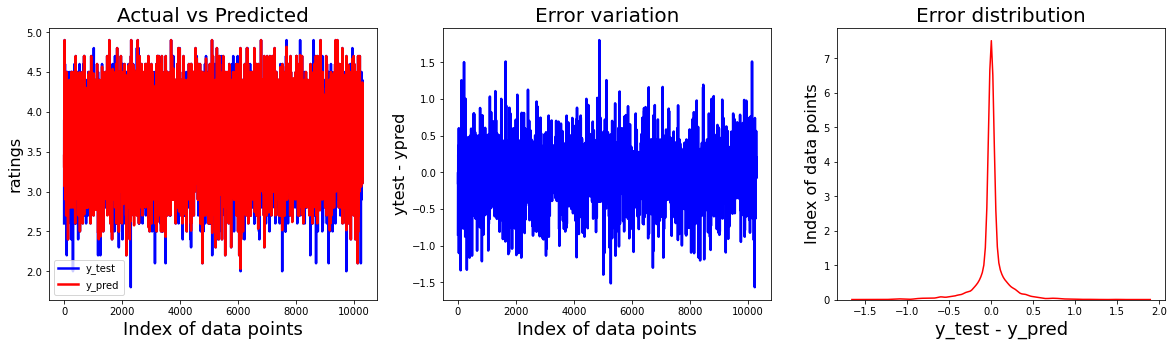

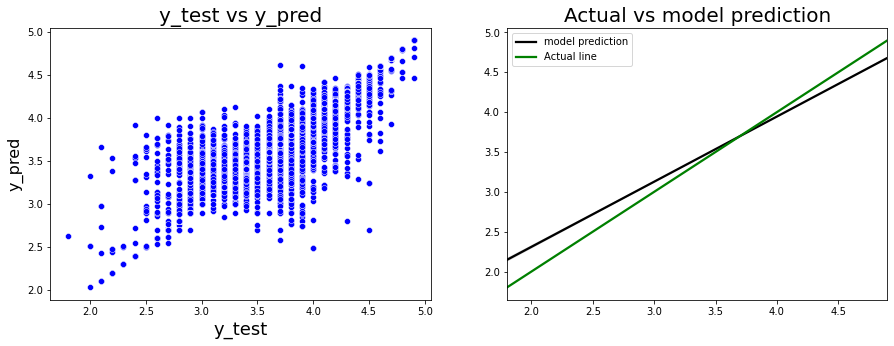

In [38]:
etree = ExtraTreesRegressor(n_jobs=-1)

print('Results for ExtraTrees Regressor:-\n')
start_time = time.time()
etree.fit(X_train,y_train)
etree_time = (time.time() - start_time)
print('Training time(sec) = ',etree_time)

y_pred1 = etree.predict(X_train)

start_time = time.time()
y_pred = etree.predict(X_test)
etree_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',etree_time2)

r2_train = r2_score(y_train,y_pred1)
r2_test = r2_score(y_test,y_pred)
mse_train = mean_squared_error(y_train,y_pred1)
mse_test = mean_squared_error(y_test,y_pred)
mae_train = mean_absolute_error(y_train,y_pred1)
mae_test = mean_absolute_error(y_test,y_pred)

print('\n\nTraining r2_score =',r2_train)
print('Testing r2_score =',r2_test)
print('\nTraining mean_square_error =',mse_train)
print('Testing mean_square_error =',mse_test)
print('\nTraining mean_absolute_error =',mae_train)
print('Testing mean_absolute_error =',mae_test)

regression_plots(y_test,y_pred,ylabel='ratings',length=y_test.shape[0])

Extra_tree = [r2_train,r2_test,mse_train,mse_test,mae_train,mae_test,etree_time,etree_time2]

In [39]:
s1=[Lasso,Extra_tree]
s2=['Lasso','Extra_tree']
col=['r2_score(train)','r2_score(test)','MSE(train)','MSE(test)','MAE(train)','MAE(train)','Training time','Prediction time']
result3=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result3[s2[i]] = s1[i]

In [40]:
temp = pd.DataFrame.from_dict(result3, orient='index',columns=col).reset_index()
result3 = temp.rename(columns={'index':'model'})

In [41]:
result3

,model,r2_score(train),r2_score(test),MSE(train),MSE(test),MAE(train),MAE(train),Training time,Prediction time
0,Lasso,0.000000,-0.000002,0.193588,0.193372,0.350636,0.350908,0.040004,0.000000
1,Extra_tree,0.988938,0.789980,0.002141,0.040612,0.008756,0.095078,46.621284,0.226046


In [42]:
result2

,model,r2_score(train),r2_score(test),MSE(train),MSE(test),MAE(train),MAE(train),Training time,Prediction time
0,Lasso,0.000000,-0.000002,0.193588,0.193372,0.350636,0.350908,0.039944,0.00000
1,Extra_tree,0.920726,0.808120,0.015347,0.037104,0.052683,0.089166,16.133626,0.21926


In [43]:
result

,model,r2_score(train),r2_score(test),MSE(train),MSE(test),MAE(train),MAE(train),Training time,Prediction time
0,Lasso,0.00000,-0.000002,0.193588,0.193372,0.350636,0.350908,0.024006,0.007995
1,Extra_tree,0.81773,0.694626,0.035285,0.059050,0.102519,0.137564,1.069073,0.118234


<h3>using numerical columns+cuisines column

In [11]:
df=pd.read_csv(r"zomato_rating2.csv") 

In [12]:
df.drop(columns=['name','city_location','rest_type','type'],inplace=True)

X=df.iloc[:,df.columns!='rate']
y=df.iloc[:,df.columns=='rate']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101)

In [13]:
other_col=['online_order','book_table']
num_features=['votes','cost']
cat_features='cuisines'

preprocessor = ColumnTransformer(
    transformers=[
        ('other','passthrough',other_col),
        ('num', scaler, num_features),
        ('cat', vec, cat_features)])

X_train= preprocessor.fit_transform(X_train)
X_test= preprocessor.transform(X_test)

preprocessor

ColumnTransformer(transformers=[('other', 'passthrough',
                                 ['online_order', 'book_table']),
                                ('num', StandardScaler(), ['votes', 'cost']),
                                ('cat', TfidfVectorizer(), 'cuisines')])

In [14]:
X_train.shape,X_test.shape

((37063, 109), (4119, 109))

Results for Lasso Regressor:-

Training time(sec) =  0.11202788352966309
Prediction time(sec) =  0.0


Training r2_score = 0.0
Testing r2_score = -2.586867836384954e-06

Training mean_square_error = 0.19311103439004973
Testing mean_square_error = 0.19733632145268876

Training mean_absolute_error = 0.3503352991632568
Testing mean_absolute_error = 0.35404330442728177


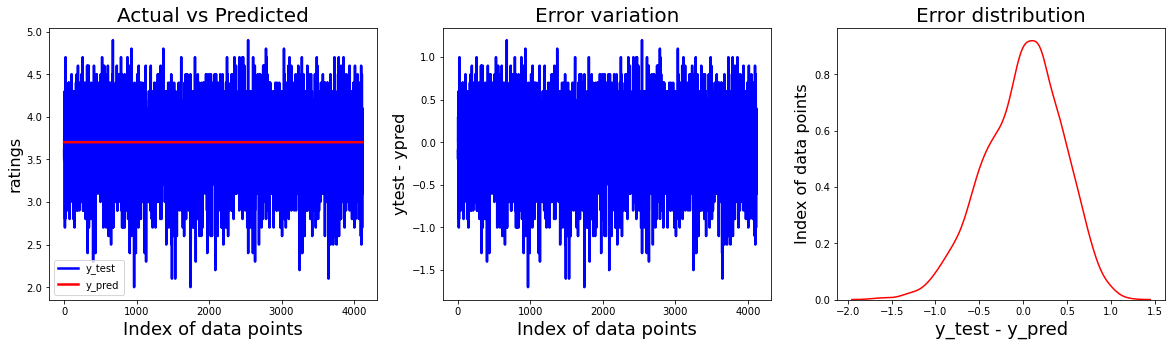

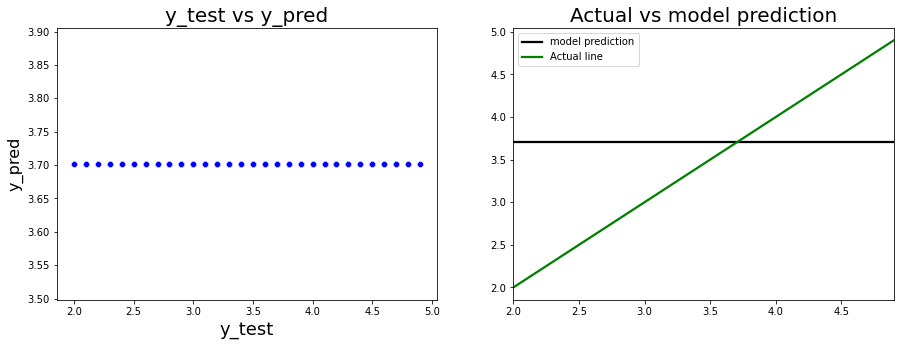

In [15]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

print('Results for Lasso Regressor:-\n')
start_time = time.time()
lasso.fit(X_train,y_train)
lasso_time = (time.time() - start_time)
print('Training time(sec) = ',lasso_time)

y_pred1 = lasso.predict(X_train)

start_time = time.time()
y_pred = lasso.predict(X_test)
lasso_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',lasso_time2)

r2_train = r2_score(y_train,y_pred1)
r2_test = r2_score(y_test,y_pred)
mse_train = mean_squared_error(y_train,y_pred1)
mse_test = mean_squared_error(y_test,y_pred)
mae_train = mean_absolute_error(y_train,y_pred1)
mae_test = mean_absolute_error(y_test,y_pred)

print('\n\nTraining r2_score =',r2_train)
print('Testing r2_score =',r2_test)
print('\nTraining mean_square_error =',mse_train)
print('Testing mean_square_error =',mse_test)
print('\nTraining mean_absolute_error =',mae_train)
print('Testing mean_absolute_error =',mae_test)

regression_plots(y_test,y_pred,ylabel='ratings',length=y_test.shape[0])

Lasso = [r2_train,r2_test,mse_train,mse_test,mae_train,mae_test,lasso_time,lasso_time2]

Results for ExtraTrees Regressor:-

Training time(sec) =  44.08669996261597
Prediction time(sec) =  0.11948394775390625


Training r2_score = 0.9887108067115107
Testing r2_score = 0.9472100192818194

Training mean_square_error = 0.002180067793369376
Testing mean_square_error = 0.010417353656167012

Training mean_absolute_error = 0.010343813229203549
Testing mean_absolute_error = 0.032720955751260244


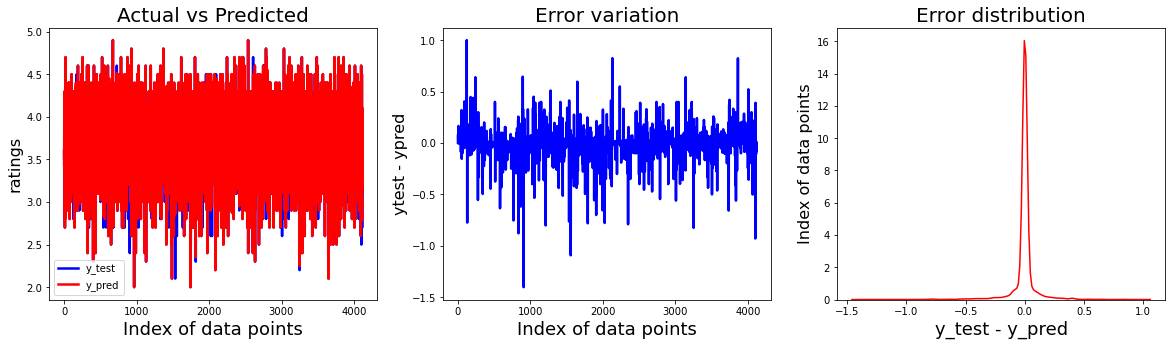

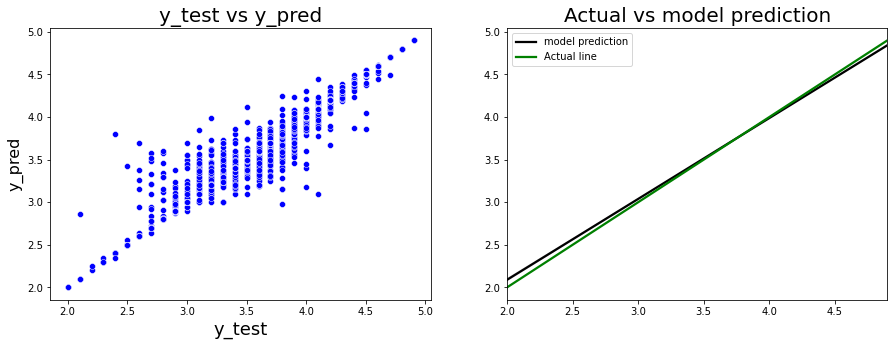

In [16]:
etree = ExtraTreesRegressor(n_jobs=-1)

print('Results for ExtraTrees Regressor:-\n')
start_time = time.time()
etree.fit(X_train,y_train)
etree_time = (time.time() - start_time)
print('Training time(sec) = ',etree_time)

y_pred1 = etree.predict(X_train)

start_time = time.time()
y_pred = etree.predict(X_test)
etree_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',etree_time2)

r2_train = r2_score(y_train,y_pred1)
r2_test = r2_score(y_test,y_pred)
mse_train = mean_squared_error(y_train,y_pred1)
mse_test = mean_squared_error(y_test,y_pred)
mae_train = mean_absolute_error(y_train,y_pred1)
mae_test = mean_absolute_error(y_test,y_pred)

print('\n\nTraining r2_score =',r2_train)
print('Testing r2_score =',r2_test)
print('\nTraining mean_square_error =',mse_train)
print('Testing mean_square_error =',mse_test)
print('\nTraining mean_absolute_error =',mae_train)
print('Testing mean_absolute_error =',mae_test)

regression_plots(y_test,y_pred,ylabel='ratings',length=y_test.shape[0])

Extra_tree = [r2_train,r2_test,mse_train,mse_test,mae_train,mae_test,etree_time,etree_time2]

In [50]:
s1=[Lasso,Extra_tree]
s2=['Lasso','Extra_tree']
col=['r2_score(train)','r2_score(test)','MSE(train)','MSE(test)','MAE(train)','MAE(train)','Training time','Prediction time']
result4=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result4[s2[i]] = s1[i]

In [51]:
temp = pd.DataFrame.from_dict(result4, orient='index',columns=col).reset_index()
result4 = temp.rename(columns={'index':'model'})

In [52]:
result4

,model,r2_score(train),r2_score(test),MSE(train),MSE(test),MAE(train),MAE(train),Training time,Prediction time
0,Lasso,0.000000,-0.000002,0.193588,0.193372,0.350636,0.350908,0.040004,0.000000
1,Extra_tree,0.988861,0.925455,0.002156,0.014415,0.010227,0.040603,34.091307,0.218523


In [53]:
result3

,model,r2_score(train),r2_score(test),MSE(train),MSE(test),MAE(train),MAE(train),Training time,Prediction time
0,Lasso,0.000000,-0.000002,0.193588,0.193372,0.350636,0.350908,0.040004,0.000000
1,Extra_tree,0.988938,0.789980,0.002141,0.040612,0.008756,0.095078,46.621284,0.226046


In [54]:
result2

,model,r2_score(train),r2_score(test),MSE(train),MSE(test),MAE(train),MAE(train),Training time,Prediction time
0,Lasso,0.000000,-0.000002,0.193588,0.193372,0.350636,0.350908,0.039944,0.00000
1,Extra_tree,0.920726,0.808120,0.015347,0.037104,0.052683,0.089166,16.133626,0.21926


In [55]:
result

,model,r2_score(train),r2_score(test),MSE(train),MSE(test),MAE(train),MAE(train),Training time,Prediction time
0,Lasso,0.00000,-0.000002,0.193588,0.193372,0.350636,0.350908,0.024006,0.007995
1,Extra_tree,0.81773,0.694626,0.035285,0.059050,0.102519,0.137564,1.069073,0.118234
